<a href="https://colab.research.google.com/github/2303A51111/ADM_LAB/blob/main/LAB_04_ADM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)
data_with_outliers=np.concatenate([data,outliers])

In [6]:
df=pd.DataFrame(data_with_outliers,columns=['value'])

In [8]:
Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [10]:
outliers_iqr=df[(df['value']<lower_bound) | (df['value'])>upper_bound]

In [11]:
z_scores=stats.zscore(df['value'])
outliers_zscore=df[np.abs(z_scores)>3]

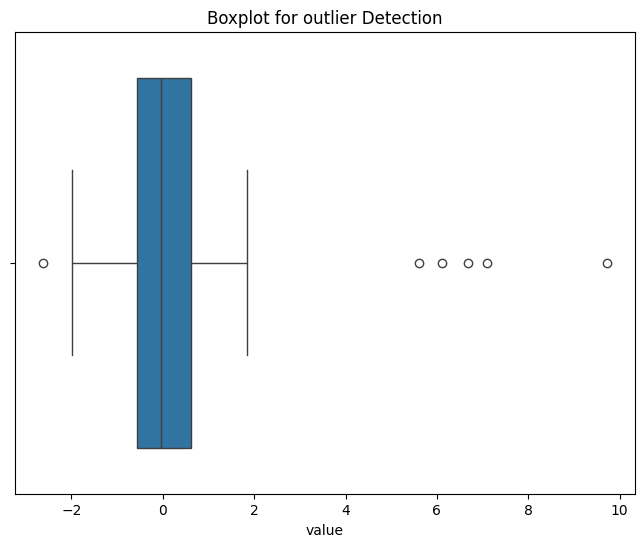

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['value'])
plt.title("Boxplot for outlier Detection")
plt.show()

In [14]:
df_capped=df.copy()
df_capped['value']=np.clip(df_capped['value'],lower_bound,upper_bound)

In [15]:
df_removed=df.copy()
df_removed=df_removed[(df_removed['value']>=lower_bound)&(df_removed['value']<=upper_bound)]

In [16]:
df_imputed=df.copy()
median_value=df['value'].median()
df_imputed['value']=np.where((df_imputed['value']<lower_bound) | (df_imputed['value']>upper_bound),median_value,df_imputed['value'])

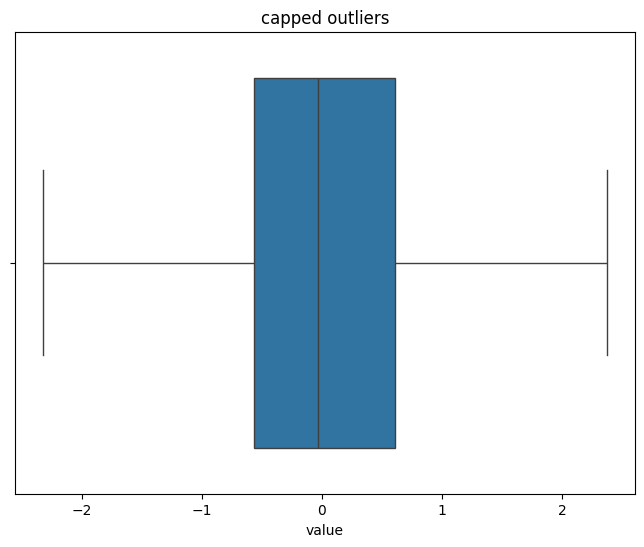

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_capped['value'])
plt.title("capped outliers")
plt.show()

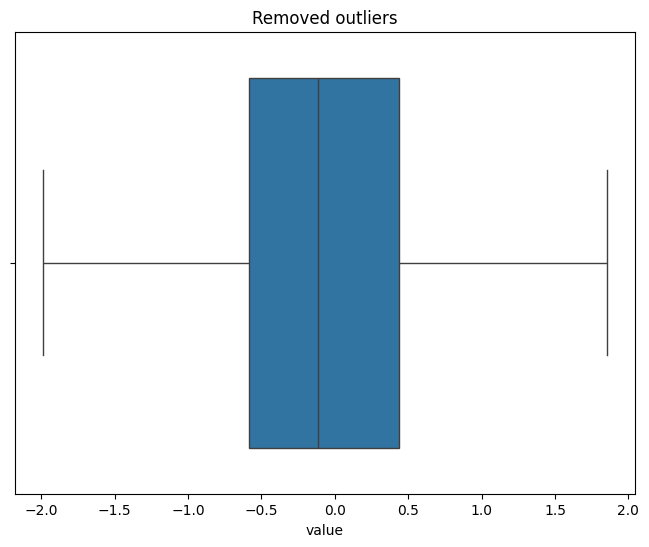

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_removed['value'])
plt.title("Removed outliers")
plt.show()

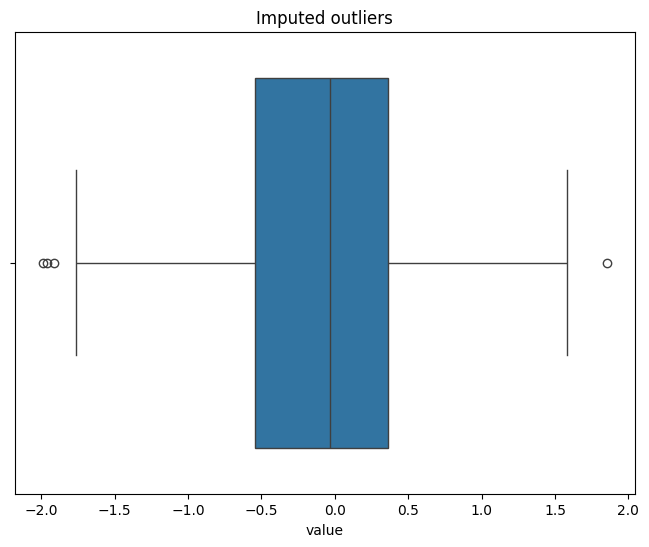

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_imputed['value'])
plt.title("Imputed outliers")
plt.show()

In [20]:
print(f"outliers detected using IQR:\n{outliers_iqr}")
print(f"outliers detected using z-score:\n{outliers_zscore}")

outliers detected using IQR:
Empty DataFrame
Columns: [value]
Index: []
outliers detected using z-score:
        value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
